# Setting up Paths

In [1]:
#path to the data
pathCOMPASOutput = '/home/cneijssel/Documents/Projects/Data/CosmicInt/'
#path to compasrepo which contains ther popsynth folder
pathRepo = '/home/cneijssel/Documents/COMPASpop'



# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import time
import sys
#Quick fudge to make import from ../Scripts work
import sys
sys.path.append(pathRepo + '/popsynth/Papers/NeijsselEtAL/CosmicIntegration/Scripts')
sys.path.append(pathRepo + '/popsynth/Papers/NeijsselEtAL/CosmicIntegration/Scripts/CosmicScripts')

# Custom Imports from COMPASrepo

In [3]:
import ClassCosmicIntegrator  as CI #Given settings and redshifts returns rates (2D arrays) Loads the data
import coencodeVarious as CV



# Single run

# The cosmic integrator class EMPTY

The cosmic integrator class is the main class used for this project.
It combines the COMPAS data class and the MSSFR class  and in addition sets the redshift shells
and delay times of the binaries. The main thing you want to calculate is a 2D-array with the rate per system per redshift shell. 


If you do not give a path to the compas data, it will create almost empty instances of the
integrator, COMPAS and MSSFR class. This is so you can at least still test functions without data.
You will have to pass the merger redshift limits of the integral. In this notebook I use the default values

hubbleConstant = 67.8, 

omegaMatter=0.308,

redshiftFirstSFR=10., \

minRedshift=0.,

maxRedshift=2., 

nrRedshiftBins=20.,\


The code will complain, to make myself aware. That I have note given the amount of systems we are looking at yet.
Hence it cannot already construct the shape of a 2D-array of rate per system per redshift.


In [4]:
Data      = CI.CosmicIntegrator(COMPASpath = None,  verbose=True)

Creating redshift shells for integral
Creating instance COMPAS class
Just to double check you create instance of ClassCOMPAS without path/Data
Remember to  self.setCOMPASDCOmask() and self.setCOMPASData()

Creating instance MSSFR class
  COMPAS data is not given given hence I set nothing
warning MSSFR instance without metallicityGrid
warning no normalisation of mass evolved assuming 1

cannot set 2D-array of rates
COMPAS data is empty (COMPAS.setCOMPASData) 


In [5]:
print Data.COMPAS.metallicityGrid

None


In [6]:
#But you can still test stuff
print Data.MSSFR.SFR_Madau(0)

14961492.4286


# The Cosmic integrator class no type specified

If in addition you give a path to data and the upper and lower limits 
of your primary mass in the python submit, then it will set the following.

1 - In the COMPAS class in the integrator, it will read the systems group in the h5file
    this contains all the inormation of the initial parameters. It reads the unique metallicities
    and sets this as the metallicityGrid of the simulation
    cosmicIntegrator.COMPAS.metallicityGrid
2 - Given the metallicityGrid and initial parameters it calculates the 'true' amount of solar mass evolved
    per metallicity. This is needed for the rate calculation. It uses the lower and upper limits that you provide
    from the pythonSubmit. Additionaly you need to give a binary fraction, which is still mass independent.
    It also assumes flat q distribution. Both need to be generalized further if you want to do Max Moe stuff.
    The default values based on my python Submit are
    COMPASMlower=5., COMPASMupper=150.,COMPASbinaryFraction=0.7
    
    
In principle you only set the above things once. This because they are general to the entire simulation
and independent of DCO type or other things.



In [7]:
Data      = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput,  verbose=True)

Creating redshift shells for integral
Creating instance COMPAS class
Remember to  self.setCOMPASDCOmask() and self.setCOMPASData()

Creating instance MSSFR class
  COMPAS path is given hence I set:
  metallicity Grid from unique metallicities allSystems
  calculate 'true' masss evolved using pythonSubmit limits given

cannot set 2D-array of rates
COMPAS data is empty (COMPAS.setCOMPASData) 


Now it has set the metallicity grid and total mass evolved
but it does not know yet at which DCO types we are looking hence it cannot give an array of masses and it still complains about the 2D-array

In [8]:
print Data.COMPAS.metallicityGrid

[ 0.0001      0.00012196  0.00014873  0.00018139  0.00022122  0.00026979
  0.00032903  0.00040128  0.00048939  0.00059685  0.00072789  0.00088772
  0.00108264  0.00132035  0.00161026  0.00196383  0.00239503  0.0029209
  0.00356225  0.00434441  0.00529832  0.00646167  0.00788046  0.00961078
  0.011721    0.0142946   0.0174333   0.0212611   0.0259294   0.0316228 ]


In [9]:
print Data.COMPAS.mass1 #still have no data

None


In reality I use this instance often because I set all the main simulation parameters once, and
switch manually between BBHs BNSs and BHNSs. This means I have to at least set the following manually

Data.COMPAS.setDCOmask(types=, withinHubbleTime=,optimistic=)  
Data.COMPAS.setCOMPASdata()   
Data.setBirthTimesAnd2Darrays()

An example below of looping over types. Note that we are not integrating yet!!! See next example

creating 2D arrays with birth ages and redshift
creating 2D array with intrinsic and observed rate to be calculated
1.55241560863
creating 2D arrays with birth ages and redshift
creating 2D array with intrinsic and observed rate to be calculated
1.55351561962
creating 2D arrays with birth ages and redshift
creating 2D array with intrinsic and observed rate to be calculated
1.55341561862


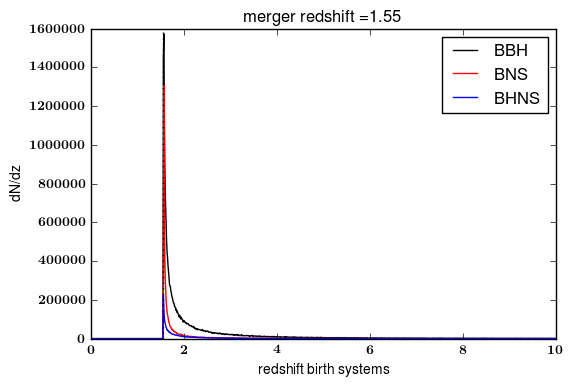

In [10]:
types        = ['BBH', 'BNS', 'BHNS']
colours      = ['k', 'r', 'b']
withinHubble = False
optimistic   = False

nrShellOfInterest = 15
redshiftBinsPlot  = np.linspace(0,10,1000)
centerBinsPlot    = (redshiftBinsPlot[1:]+redshiftBinsPlot[:-1])/2.
binWidthPlot      = np.diff(redshiftBinsPlot)

fig, axes = plt.subplots(1,1)
for nrT, Type in enumerate(types):
    #get the mask of DCO file
    Data.COMPAS.setCOMPASDCOmask(types=Type, withinHubbleTime=withinHubble,optimistic=optimistic)
    #Get the data given the mask
    Data.COMPAS.setCOMPASData()
    #Set the delay times per redshift shell
    Data.setBirthTimesAnd2Darrays()
    
    #Now we have 2Darrays each row a redshift each column a system
    birthz = Data.PerSystemPerRedshift_redshiftBirth[nrShellOfInterest]
    #bin it
    hist, bins = np.histogram(birthz, bins=redshiftBinsPlot)
    hist       = np.divide(hist, binWidthPlot)
    axes.plot(centerBinsPlot, hist, c=colours[nrT], label=Type)
    #systems that are unreal have z = -1
    birthz = birthz[birthz != -1]
    print np.min(birthz)
    
#double check if minimum redshift is same as shell redshift
z = Data.Shell_centerRedshift[nrShellOfInterest]
axes.axvline(z, linestyle=':', c='k')

axes.set_title('merger redshift =%s' %(np.round(z,3)))

axes.set_xlabel('redshift birth systems')
axes.set_ylabel('dN/dz')
axes.legend()
plt.show()

    

# The Cosmic integrator class , I know what I want

If you know that you only want to look at BHNSs that merge within a Hubble time using the pessimistic assumption
You might as well set everything all at once.

In [11]:
Data = CI.CosmicIntegrator(\
    COMPASpath = pathCOMPASOutput,DCOtypes='BBH', withinHubbleTime=True, optimistic=False,\
\
    hubbleConstant = 67.8, omegaMatter=0.308,redshiftFirstSFR=10., \
    COMPASlazyData=True,COMPASMlower=5.,\
    COMPASMupper=150.,COMPASbinaryFraction=0.7,COMPASmetallicityGrid=None,\
    minRedshift=0.0000000001,   maxRedshift=2., nrRedshiftBins=20,\
    RedshiftTabulated =True, RedshiftTabulatedResolution=100000,
    GWdetector_sensitivity='O1', GWdetector_snrThreshold=8, verbose = True)

Creating redshift shells for integral
Creating instance COMPAS class
Remember to  self.setCOMPASDCOmask() and self.setCOMPASData()

Creating instance MSSFR class
  COMPAS path is given hence I set:
  metallicity Grid from unique metallicities allSystems
  calculate 'true' masss evolved using pythonSubmit limits given
creating 2D arrays with birth ages and redshift
creating 2D array with intrinsic and observed rate to be calculated


# The actual integration

If everything is set accordingly, then you still need to define the MSSFR and then do the actual integration/calculation by

Doing the actual cosmic integration
Filling in the 2D arrays with rate per system per redshift


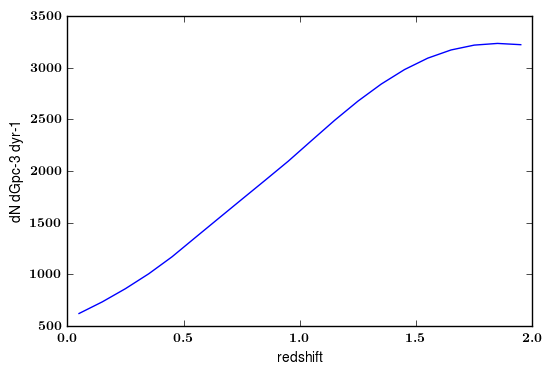

In [12]:
Data.MSSFR.Zprescription         = 'MZ_GSMF'
#current Options  = logNormal' or 'MZ_GSMF

#If you use MZ and GSMF relations
Data.MSSFR.GSMFprescription      = 'Furlong et al. (2015) Double'
# Current Options = Panter et al. (2004) Single, 
#                   Furlong et al. (2015) Single,
#                   Furlong et al. (2015) Double
Data.MSSFR.ZMprescription        = 'Langer et al. (2006)'
# Current Options = Ma et al. (2015),
#                   Langer et al. (2006)
#                   Langer et al. +offset (2006)
Data.MSSFR.SFRprescription       = 'Madau et al. (2014)' 
#Current Options  = Madau et al. (2014)
#                   Madau et al. (2017)
#                   Strolger et al (2004)
Data.cosmologicalIntegration()

#this calculates the 2d arrays (row = redshift  column = system)
ratesIntrinsic2D = Data.PerSystemPerRedshift_ratesIntrinsic
#Want rate per redshift so add up all systems in row
ratesIntrinsicRedshift = np.sum(ratesIntrinsic2D, axis=1)


fig,axes = plt.subplots(1,1)


axes.plot(Data.Shell_centerRedshift, ratesIntrinsicRedshift)
axes.set_xlabel('redshift')
axes.set_ylabel('dN  dGpc-3 dyr-1')
plt.show()


In [13]:
#note that you can still manually overwrite the DCO of interest in the instance above :)

# Convergence test nr shells (WARNING takes a bit to run)

Remember to  self.setCOMPASDCOmask() and self.setCOMPASData()

cannot set 2D-array of rates
COMPAS data is empty (COMPAS.setCOMPASData) 
BBH
BNS
BHNS


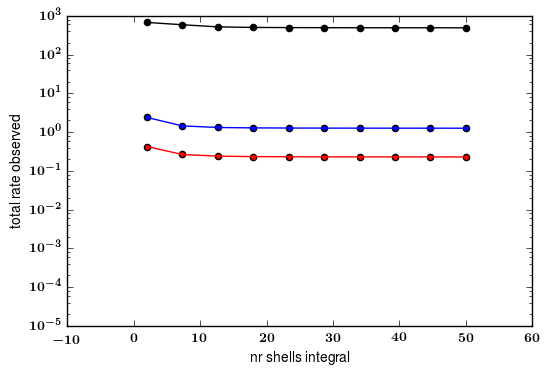

In [14]:
# Convergence test for observed total rates
types   = ['BBH', 'BNS', 'BHNS']
colours = ['k', 'r', 'b']

#maximum redshift to detect during O1 (I know this from previous tries)
#But should also have an in-built warning
maxZ    = [1, 0.1, 0.2]
nrShells = np.linspace(2,50,10)
Data = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput)
Data.MSSFR.Zprescription         = 'MZ_GSMF'
Data.MSSFR.GSMFprescription      = 'Furlong et al. (2015) Double'
Data.MSSFR.ZMprescription        = 'Langer et al. (2006)'
Data.MSSFR.SFRprescription       = 'Madau et al. (2014)' 

fig, axes = plt.subplots(1,1)
for nrt, Type in enumerate(types):
    print Type    
    Data.COMPAS.setCOMPASDCOmask(types=Type)
    Data.COMPAS.setCOMPASData()
    Data.maxRedshift = maxZ[nrt]
    
    totalRateObserved = np.zeros(len(nrShells))
    for nrr, resolution in enumerate(nrShells):
        Data.nrRedshiftBins = resolution
        #I have messed with the settings of shell so
        #reset everything shell related
        Data.createConcentricRedshiftShells()
        Data.setBirthTimesAnd2Darrays()
        #Do intergral and get total rate
        Data.cosmologicalIntegration()
        totalRateObserved[nrr] = np.sum(Data.PerSystemPerRedshift_ratesObserved)
    axes.plot(nrShells, totalRateObserved, c=colours[nrt], label=Type)
    axes.scatter(nrShells, totalRateObserved, c=colours[nrt], label=None)
axes.set_yscale('log')
axes.set_ylim(bottom=0.00001)
axes.set_xlabel('nr shells integral')
axes.set_ylabel('total rate observed')
plt.show()

In [15]:
#The above plot suggests that 20 shells is enough
#I often end up using more for aesthetic reasons in plots :D